In [9]:
import numpy as np
from numba import jit
from AFM_sinc import MDR_SLS_sinc_noise
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


C:\Users\Enrique Alejandro\Mis documentos\github\Impulsive_Sinc\SimulationsSciRep


## Cantilever and simulation parameters

In [2]:
A = -1.36e-9  #amplitude of the sinc excitation
R = 10.0e-9  #radius of curvature of the parabolic tip apex
startprint = 0.0
simultime = 1200.0e-6 #total simulation time
fo1 =20.0e3  #cantilever 1st mode resonance frequency
omega = 2.0*np.pi*fo1
period1 = 1.0/fo1  #fundamental period
to =7.0*period1   #centered time of the sinc excitation
fo2 = 6.27*fo1
fo3 = 17.6*fo1
Q1 = 2.0 #cantilever's 1st mode quality factor
Q2 = 8.0
Q3 = 12.0
BW = 2.5*fo1*2.0  #excitation bandwith of sinc function
k_m1 =  0.25 #cantilever's 1st mode stiffness
zb = 3.85e-9  #cantilever equilibrium position
period2 = 1.0/fo2
period3 = 1.0/fo3
dt= period3/1.0e3 #simulation timestep
printstep = period3/100.0 #timestep in the saved time array

## Simulation with thermal noise, no external excitation

In [3]:
G = 1.0e6
Ge = 1.0e6
tau = 0.1
nu = 0.5

zb = 100.0e-9

mdr_jit = jit()(MDR_SLS_sinc_noise)

Temp = 273.16 + 25
%time t, tip, _, _, _, _, z1, z2, z3 = mdr_jit(A, to , BW, G, tau, R, dt, startprint, simultime, fo1, k_m1, zb, printstep, Ge, Q1, Q2, Q3, nu, 10, 1.0e-9, Temp)


Wall time: 1min 13s


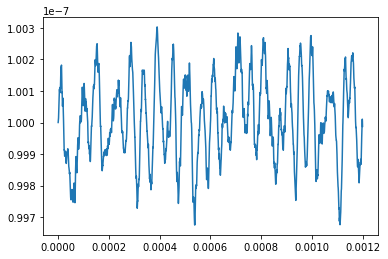

In [4]:
plt.plot(t, tip)

## Making FFT of z1

(0.0, 352.0)

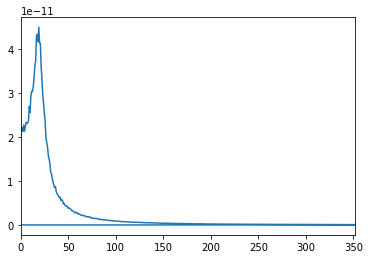

In [5]:
z1_nu = np.fft.fft(z1)/len(t)
nu = np.fft.fftfreq(len(t),printstep)

A = 2.0*np.real(z1_nu)
B = -2.0*np.imag(z1_nu)
Amp = np.sqrt(A**2+B**2)

sf = 1.0/printstep    #sampling frequency
Nyquist = 1.0/2*sf
plt.plot(nu*1.0e-3, Amp)
plt.xlim(0.0,Nyquist/50.0*1.0e-3)

In [6]:
print nu[np.argmax(Amp)]

19167.1204337


## Making FFT of tip

(0.0, 5e-11)

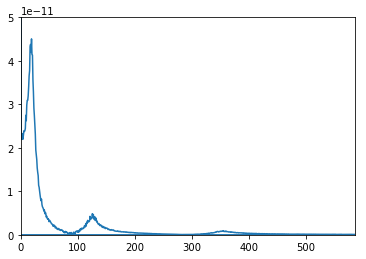

In [7]:
tip_nu = np.fft.fft(tip)/len(t)
nu = np.fft.fftfreq(len(t),printstep)

A = 2.0*np.real(tip_nu)
B = -2.0*np.imag(tip_nu)
Amp = np.sqrt(A**2+B**2)

sf = 1.0/dt    #sampling frequency
Nyquist = 1.0/2*sf
plt.plot(nu*1.0e-3, Amp)
plt.xlim(0.0,Nyquist/300.0*1.0e-3)
plt.ylim(0.0,0.5e-10)

In [8]:
print 20.0*17.6


352.0
